In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

Source: "Introduction to Statistical Learning" (Hastie, James)

## Lab 1: Principal Component Analysis

In [16]:
# In R, I exported the dataset to a csv file. It is part of the base R distribution.
df = pd.read_csv('USArrests.csv', index_col=0)
print df.info()
print df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None
Index([u'Murder', u'Assault', u'UrbanPop', u'Rape'], dtype='object')


In [4]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [5]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [15]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
print X.head()

              Murder   Assault  UrbanPop      Rape
Alabama     1.255179  0.790787 -0.526195 -0.003451
Alaska      0.513019  1.118060 -1.224067  2.509424
Arizona     0.072361  1.493817  1.009122  1.053466
Arkansas    0.234708  0.233212 -1.084492 -0.186794
California  0.281093  1.275635  1.776781  2.088814


In [13]:
PCA().fit(X).components_

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [18]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings.sort('V1')

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


                V1        V2        V3        V4
Assault  -0.583184  0.187986 -0.268148 -0.743407
Rape     -0.543432 -0.167319  0.817778  0.089024
Murder   -0.535899  0.418181 -0.341233  0.649228
UrbanPop -0.278191 -0.872806 -0.378016  0.133878

In [9]:
-0.535899**2 +  -0.583184**2+ -0.278191**2 + -0.543432**2

-0.9999998871620001

In [17]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.sort_values(by='PC2', ascending=False)

                     PC1       PC2       PC3       PC4
Mississippi    -0.996494  2.393796 -0.740808  0.215508
North Carolina -1.123379  2.228003 -0.863572 -0.954382
South Carolina -1.320724  1.933405 -0.300538 -0.131467
West Virginia   2.108585  1.424847  0.104775  0.131909
Vermont         2.801412  1.402288  0.841263 -0.144890
Georgia        -1.639283  1.278942 -0.342460  1.076797
Alabama        -0.985566  1.133392 -0.444269  0.156267
Arkansas        0.141420  1.119797  0.114574 -0.182811
Alaska         -1.950138  1.073213  2.040003 -0.438583
Kentucky        0.750859  0.958440 -0.028369  0.670557
Louisiana      -1.564818  0.871055 -0.783480  0.454728
Tennessee      -0.999742  0.860251  0.188083  0.652864
South Dakota    1.987775  0.823343  0.389293 -0.109572
North Dakota    2.992226  0.599119  0.301277 -0.253987
Montana         1.185452  0.536874  0.246889  0.123742
Maryland       -1.763369  0.427655 -0.157250 -0.559070
Maine           2.396829  0.376392 -0.065682 -0.330460
Wyoming   

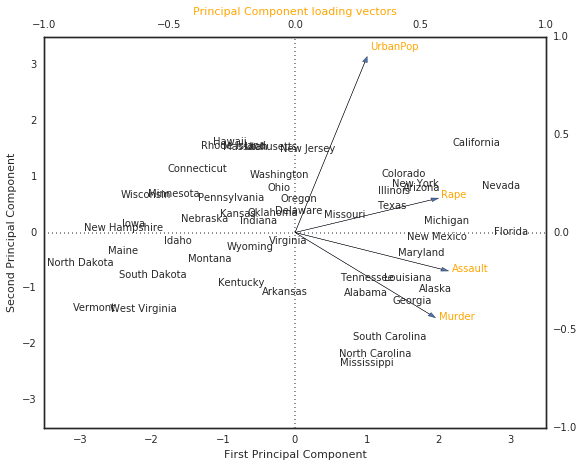

In [11]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3]);

In [14]:
# Standard deviation of the four principal components
np.sqrt(pca.explained_variance_)

array([ 1.57487827,  0.99486941,  0.59712912,  0.41644938])

In [15]:
pca.explained_variance_

array([ 2.48024158,  0.98976515,  0.35656318,  0.17343009])

In [16]:
pca.explained_variance_ratio_

array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752])

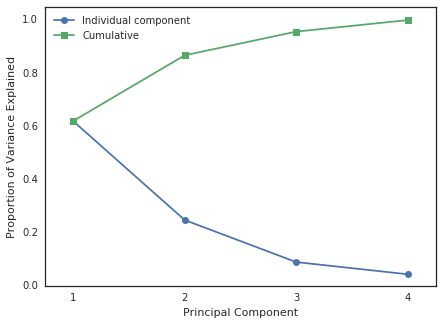

In [17]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);